In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D

In [62]:
# Input inage from local system

image = cv2.imread(r"C:\Users\patel\OneDrive\Desktop\cracker.jpg", cv2.IMREAD_GRAYSCALE)


In [63]:
# Data pre-processing 

resize_image = cv2.resize(image,(224,224))
normalized_image = resize_image.astype('float32') / 255.0

In [64]:
# Defining Batchs
final_image = np.expand_dims(normalized_image, axis=0)
final_image = np.expand_dims(final_image, axis=-1)

In [65]:
# Defining Filters
# Vertical_kernel

custom_kernel = np.array([
    # Vertical filter
    [[ 1,  0, -1],
     [ 1,  0, -1],
     [ 1,  0, -1]],

    # Horizontal filter
    [[ 1,  1,  1],
     [ 0,  0,  0],
     [-1, -1, -1]],

    # Sobel X filter
    [[-1,  0,  1],
     [-2,  0,  2],
     [-1,  0,  1]],

    # Scharr X filter
    [[-3,  0,  3],
     [-10, 0, 10],
     [-3,  0,  3]]
], dtype=np.float32)

In [66]:
# Rearranging to shape

custom_kernel = np.transpose(custom_kernel, (1, 2, 0))  # Now shape: (3, 3, 4)
custom_kernel = np.expand_dims(custom_kernel, axis=2) 

In [67]:
# Creating CNN Architecture

input_tensor = Input(shape=(224,224,1))

conv_layer = Conv2D(
    filters=4,
    kernel_size=(3,3),
    padding='same',
    use_bias=False,
    trainable=False,
    name='custom_conv'
)(input_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


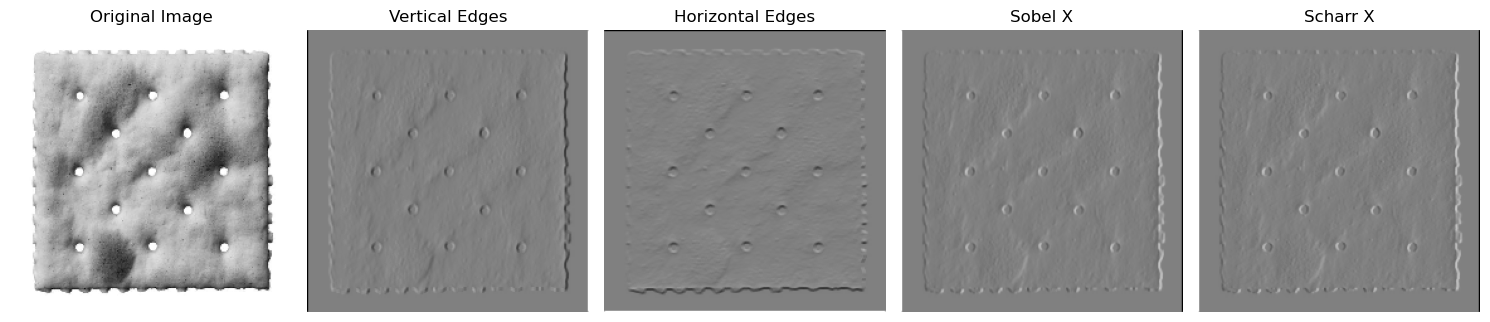

In [85]:
# Model
model = Model(inputs=input_tensor, outputs=conv_layer)

model.layers[1].set_weights([custom_kernel])
feature_maps = model.predict(final_image)

# Visualization 

filter_names = [
    'Vertical Edges', 
    'Horizontal Edges',
    'Sobel X', 
    'Scharr X'
]

fig, axes = plt.subplots(1, 5, figsize=(15,5))
axes[0].imshow(normalized_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i in range(4):
    axes[i + 1].imshow(feature_maps[0, :, :, i], cmap='gray')
    axes[i + 1].set_title(filter_names[i])
    axes[i + 1].axis('off')

plt.tight_layout()
plt.show()

## Learnings


- Verrtical and Horizontal kernerl detect the edge in the respective formate.
- While Sobel and scharr both use graident in pixel intensity to detect edges, However, sobal have simple weights (vertical gradient), 
- scharr kernerl emphasize more on certain pxiel than other, specily those near the center of kernel.

#### Sobel Filter:
- Uses simpler, smaller weights. It captures edge information well in many cases but can be less sensitive to subtle changes or rotated edges.

#### Scharr Filter:
- Uses enhanced (larger) weights to provide a more accurate and consistent measure of the gradient, particularly when edges are not perfectly aligned with the horizontal or vertical axes.

